In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanAbsoluteError

In [2]:

dataset = pd.read_csv('ecg.csv')
dataset.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [3]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[:,-1].values
print(y)

[1. 1. 1. ... 0. 0. 0.]


In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [5]:
 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)


train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)


train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [6]:

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)


#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

print(an_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)
tf.Tensor(
[[0.4304001  0.35345322 0.30342638 ... 0.30506894 0.262255   0.2502011 ]
 [0.4494794  0.37906834 0.3202905  ... 0.31546655 0.39611116 0.46317974]
 [0.49198422 0.4355403  0.3698029  ... 0.5260356  0.52524984 0.5278486 ]
 ...
 [0.43457043 0.362154   0.34958026 ... 0.3179064  0.3426891  0.49215436]
 [0.4814947  0.4255184  0.38368973 ... 0.29031053 0.3311408  0.4467481 ]
 [0.4276824  0.3507402  0.31587753 ... 0.3177887  0.33242297 0.419218  ]], shape=(1639, 140), dtype=float32)


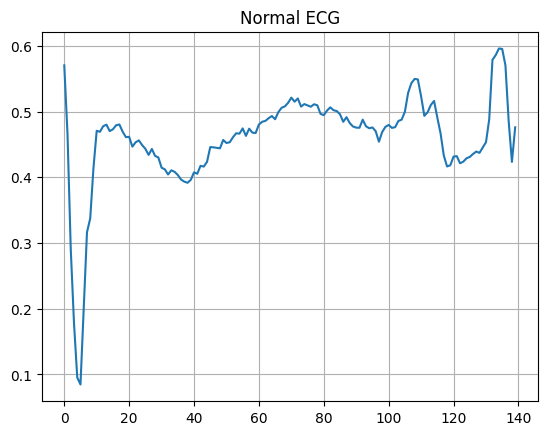

In [7]:
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

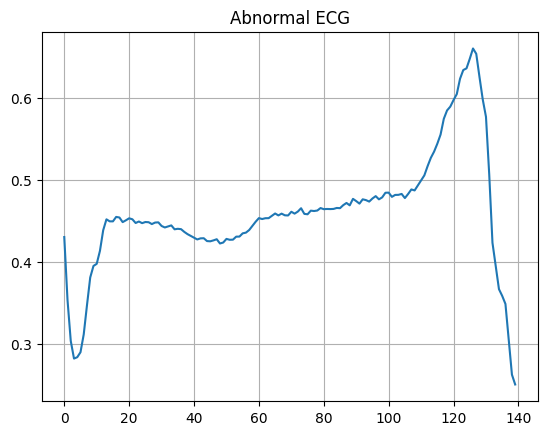

In [8]:
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

In [9]:
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded




In [10]:

autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 2s 132ms/step - loss: 0.0603 - val_loss: 0.0573
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0567 - val_loss: 0.0557
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0551 - val_loss: 0.0535
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0525 - val_loss: 0.0504
Epoch 5/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0492 - val_loss: 0.0467
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0455 - val_loss: 0.0428
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0416 - val_loss: 0.0389
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0378 - val_loss: 0.0356
Epoch 9/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0347 - val_loss: 0.0328
Epoch 10/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0322 - val_loss: 0.0307
Epoch 11/20
5/5 [===========

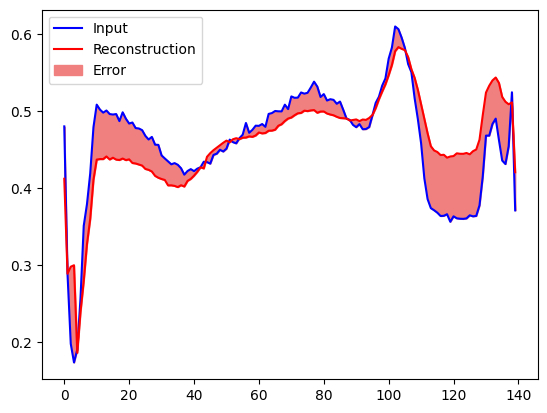

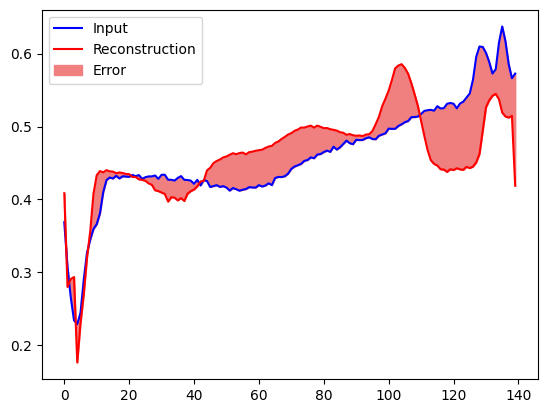

In [11]:

def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

In [12]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)

reconstructed_a = autoencoder(an_train_data)
train_loss_a = losses.mae(reconstructed_a, an_train_data)


t = np.mean(train_loss) + np.std(train_loss)
print(" threshold value obtained is:", t)


def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  
  
  return tf.math.less(loss, threshold)


 threshold value obtained is: 0.03359748


In [13]:
pred = prediction(autoencoder, n_test_data, t)

print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

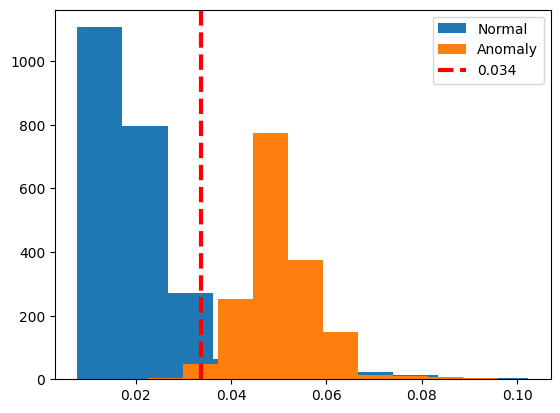

In [14]:
plt.hist(train_loss, bins = 10, label = 'Normal')
plt.hist(train_loss_a, bins = 10, label = 'Anomaly')
plt.axvline(t, color='r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(t))
plt.legend(loc = 'upper right')
plt.show()

Accuracy Testing on Normal ECG data.

In [15]:

preds = tf.math.less(train_loss, t)
tf.math.count_nonzero(preds)


<tf.Tensor: shape=(), dtype=int64, numpy=2135>

In [21]:
preds.shape

TensorShape([2359])

Accuracy Testing on Anomaly ECG data.

In [17]:
preds_a = tf.math.greater(train_loss_a, t)
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=1616>

In [23]:
preds_a.shape

TensorShape([1639])

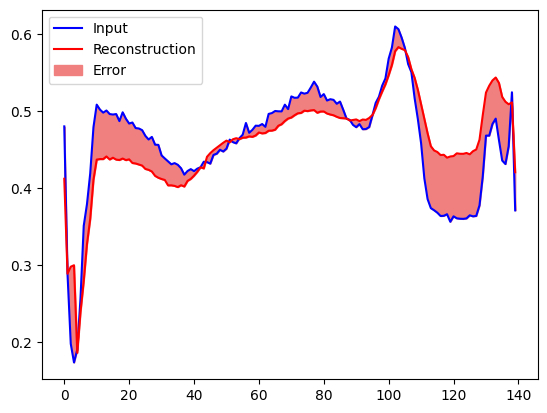

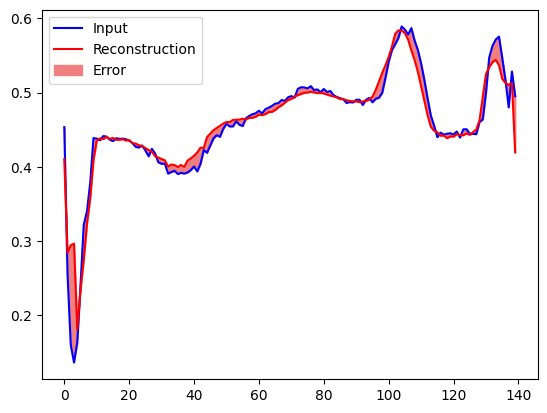

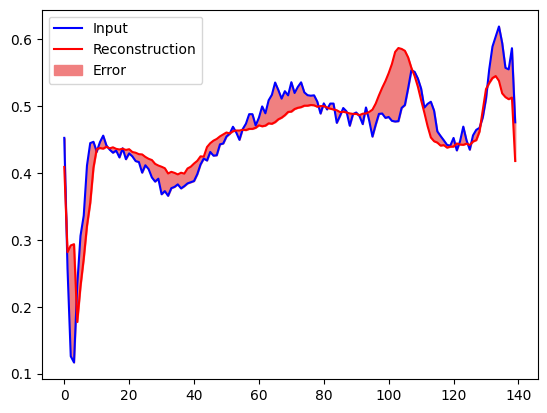

In [19]:
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 2)